In [1]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

# Import the necessary packages and modules
import datetime, os
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('./sci.mplstyle')
from tensorflow.keras import datasets, layers, models, losses

2022-09-12 00:10:42.799183: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-12 00:10:43.100452: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-12 00:10:43.554889: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/intel/oneapi/mpi/latest/lib:/opt/intel/oneapi/compiler/latest/linux/comcompiler/lib/intel64:/opt/intel/oneapi/mkl/latest/lib/intel64::/home/hagi/.local/lib
2022-09-12 00:10:43.554948: W tensorflow/stream_exe

In [2]:
# Read MNIST dataset
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

print('Train shape:', x_train.shape)
print('Train samples:', x_train.shape[0])
print('Test samples:', x_test.shape[0], )
print('Image shape:', x_train[0].shape)

Train shape: (60000, 28, 28)
Train samples: 60000
Test samples: 10000
Image shape: (28, 28)


In [3]:
# Add pad to extend size for input matrix
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train.shape

2022-09-12 00:11:10.291123: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-12 00:11:10.438551: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/intel/oneapi/mpi/latest/lib:/opt/intel/oneapi/compiler/latest/linux/comcompiler/lib/intel64:/opt/intel/oneapi/mkl/latest/lib/intel64::/home/hagi/.local/lib
2022-09-12 00:11:10.438610: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering 

TensorShape([60000, 32, 32])

In [4]:
# Add dimension for input matrix
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train.shape

TensorShape([60000, 32, 32, 1])

In [5]:
# Validation data extraction 
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]
x_train.shape

TensorShape([58000, 32, 32, 1])

In [6]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation='tanh', input_shape=x_train.shape[1:]))
model.add(layers.MaxPool2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(16, 5, activation='tanh'))
model.add(layers.MaxPool2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(120, 5, activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 activation (Activation)     (None, 14, 14, 6)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 activation_1 (Activation)   (None, 5, 5, 16)          0

In [7]:
# Configures the CNN model for training
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
# Store log for TensorBoard
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
# Training the CNN model with the given inputs
history = model.fit(x=x_train, y=y_train, batch_size=64, epochs=20, validation_data=(x_val, y_val), callbacks=[tensorboard_callback])

Epoch 1/20
907/907 [==============================] - 16s 17ms/step - loss: 1.6318 - accuracy: 0.3951 - val_loss: 0.3101 - val_accuracy: 0.9125
Epoch 2/20
907/907 [==============================] - 21s 23ms/step - loss: 0.2744 - accuracy: 0.9147 - val_loss: 0.1495 - val_accuracy: 0.9595
Epoch 3/20
907/907 [==============================] - 16s 18ms/step - loss: 0.1897 - accuracy: 0.9393 - val_loss: 0.1488 - val_accuracy: 0.9565
Epoch 4/20
907/907 [==============================] - 17s 18ms/step - loss: 0.1474 - accuracy: 0.9540 - val_loss: 0.1011 - val_accuracy: 0.9735
Epoch 5/20
907/907 [==============================] - 17s 19ms/step - loss: 0.1303 - accuracy: 0.9592 - val_loss: 0.0879 - val_accuracy: 0.9755
Epoch 6/20
907/907 [==============================] - 17s 19ms/step - loss: 0.1177 - accuracy: 0.9630 - val_loss: 0.0817 - val_accuracy: 0.9765
Epoch 7/20
907/907 [==============================] - 17s 18ms/step - loss: 0.1078 - accuracy: 0.9650 - val_loss: 0.0988 - val_accuracy:

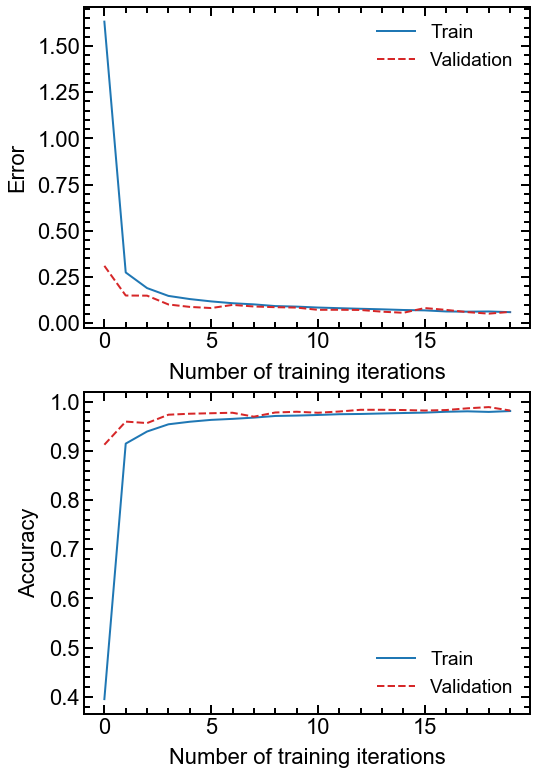

In [8]:
# Plot results with Matplotlib
fig, axs = plt.subplots(2, 1, figsize=(8,13))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'],ls='--')
axs[0].set_xlabel('Number of training iterations')
axs[0].set_ylabel('Error')
axs[0].legend(['Train', 'Validation'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'],ls='--')
axs[1].set_xlabel('Number of training iterations')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Validation'])

# Show figure
plt.savefig('LeNet5.png', format="png", dpi=600)
plt.show()

In [9]:
# Evaluating the already trained CNN model using the test data
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0607 - accuracy: 0.9817


[0.060676831752061844, 0.9817000031471252]

In [10]:
# Show data with TensorBoard
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 31954), started 1:58:11 ago. (Use '!kill 31954' to kill it.)